<a href="https://colab.research.google.com/github/gonoott/EntregaFinalOttavianoGonzalo/blob/main/ProyectoParteIIIOttavianoGonzalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega final proyecto Datascience: Vehiculos de importacion 1985

**Objteivo**: Implementar un modelo supervisado predictivo para variables categoricas que me permita predecir el tipo de combustible segun diferentes caracteristicas del vehiculo.


# Indice:

#### 1. Introduccion y objetivo
#### 2. Hipotesis
#### 3. Carga y procesamiento
#### 4. Variable objetivo y codificacion
#### 5. Division del dataset
#### 6. Entrenar modelo
#### 7. Evaluar modelo
#### 8. Resultados
#### 9. Conclusion

### Introduccion y Objetivo
Este proyecto tiene como finalidad predecir el tipo de combustible de los vehiculos de importacion en la ciudad de Ney York, para una empresa petrolifera que desea estimar la demanda de combustible de años venideros y no posee la informacion completa, ya que hay base de datos como las de las agencias de seguro que no tienen dicha caracteristicas descipra. Por eso se opto por desarrollar un modelo predictivo basado en las fichas tecnicas de de los vehiculos importados.


## Hipoteis

***Hipotesis nula (H0)***: No hay diferencia significativa en las características de los vehículos entre los que utilizan combustible de gasolina y            los que utilizan combustible diesel. Es decir, las características de los vehículos no permiten predecir el tipo de combustible.  

***Hipotesis alternativa (H1)***: Hay una diferencia significativa en las características de los vehículos entre los que utilizan combustible de               gasolina y los que utilizan combustible diesel. Es decir, las características de los vehículos permiten predecir el tipo de combustible.    

### 1. **Cargar y Preprocesar el Dataset**

- **Carga de Datos**: Se utilizó la biblioteca pandas para cargar el conjunto de datos desde un archivo CSV. Este conjunto de datos contiene información sobre diferentes vehículos, incluyendo características como el tipo de combustible, el número de cilindros, el peso, entre otros.
  
- **Manejo de Valores Faltantes**: Se reemplazaron los valores faltantes representados por '?' con NaN para facilitar su manejo. Posteriormente, se eliminaron las filas que contenían valores NaN en la columna fuel-type, asegurando que solo se incluyeran datos completos en el análisis.

In [ ]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv("C:\\Users\\gonza\\Downloads\\archive\\Automobile_data.csv")

# Verificar
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [ ]:
# Reemplazar ? con NaN
df.replace('?', np.nan, inplace=True)


# Eliminar filas con NaN
df.dropna(subset=['fuel-type'], inplace=True)

### 2. **Definir la Variable Objetivo codificar**

- **Creación de la Variable Objetivo**: Se creó una nueva columna llamada target que indica si el tipo de combustible es "gas" (1) o "diesel" (0). Esto permite que el modelo aprenda a predecir el tipo de combustible basado en otras características del vehículo.

- **Definición de Características**: Se definieron las características X que se utilizarían para entrenar el modelo, excluyendo la columna target y fuel-type, ya que esta se utilizó para crear la variable objetivo.

- **Codificación de Variables**: Se utilizó get_dummies para convertir las variables categóricas en variables numéricas, para que los modelos de machine learning puedan procesar los datos, ya que requieren entradas numéricas.

In [ ]:
# Crear una nueva columna 'target' para la clasificación
df['target'] = np.where(df['fuel-type'] == 'gas', 1, 0)  # 1 para gasolina, 0 para diesel

# Eliminar filas con NaN
df.dropna(subset=['target'], inplace=True)

In [ ]:
# Codificar las variables categóricas, excluyendo 'fuel-type' ya que la hemos utilizado para crear 'target'
df_encoded = pd.get_dummies(df, drop_first=True)


# Definir características (X) y variable objetivo (y)
X = df_encoded.drop(['target'], axis=1)  # Eliminar solo la columna 'target'
y = df_encoded['target'].astype(int)  # Convertir a entero

### 3. **Dividir el Dataset en Conjuntos de Entrenamiento y Prueba**

- **División de Datos**: Se dividió el conjunto de datos en conjuntos de entrenamiento y prueba utilizando train_test de sklearn. Esto permite entrenar el modelo en un subconjunto de los datos y evaluar su rendimiento en un conjunto separado, asegurando que el modelo no esté sobreajustado.

In [ ]:
from sklearn.model_selection import train_test_split


# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. **Entrenar un Modelo de Clasificación**

- **Selección del Modelo**: Se eligió un modelo de clasificación, RandomForestClassifier, que es efectivo para problemas de clasificación.

- **Entrenamiento del Modelo**: El modelo se entrenó utilizando el conjunto de entrenamiento, permitiéndole aprender a predecir el tipo de combustible basado en las características de los vehículos.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 5. **Evaluar el Modelo**

- **Predicciones y Evaluación**: Se realizaron predicciones en el conjunto de prueba y se evaluó el rendimiento del modelo utilizando métricas como la precisión, la matriz de confusión y el reporte de clasificación. Esto proporciona una visión clara de cuán bien el modelo está funcionando.

Precisión del modelo: 1.00


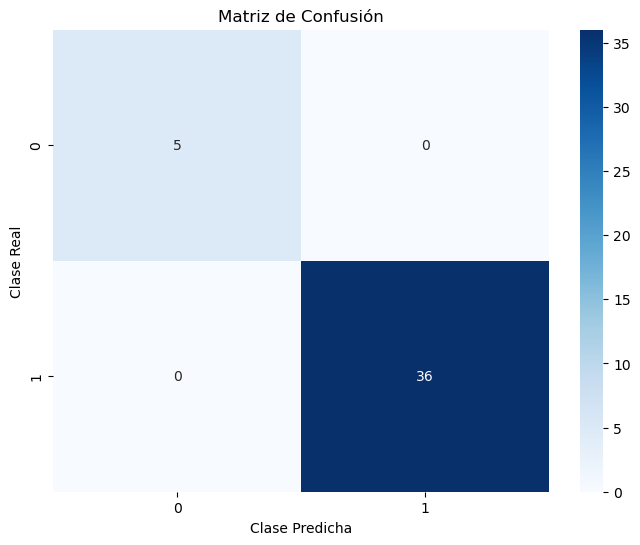

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        36

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)


# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')


# Crear la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()


# Reporte de clasificación
print(classification_report(y_test, y_pred))

### 6. **Visualización de Resultados**

Se incluyeron varias visualizaciones para entender mejor el rendimiento del modelo y los datos:
  - **Distribución de la Variable Objetivo**: Se visualizó cuántos vehículos son de nafta y cuántos son diesel.
  - **Matriz de Confusión**: Se presentó la matriz de confusión para evaluar el rendimiento del modelo en verdaderos positivos y falsos positivos.
  - **Curva ROC y AUC**: Se evaluó el rendimiento del modelo en diferentes umbrales de clasificación.

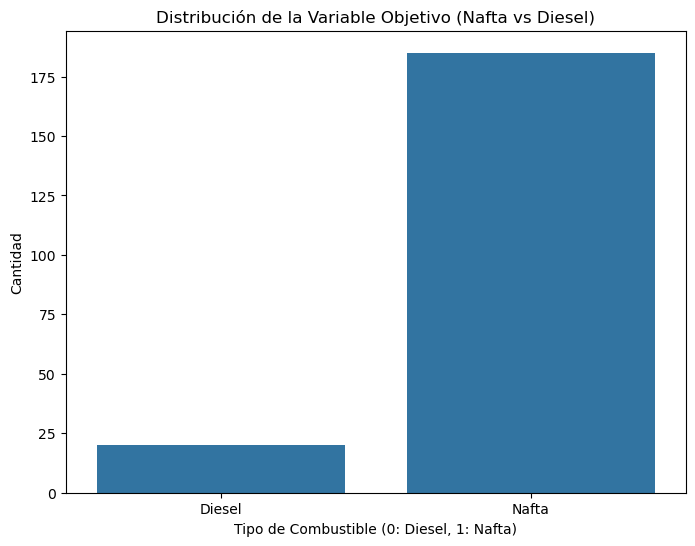

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_encoded)
plt.title('Distribución de la Variable Objetivo (Nafta vs Diesel)')
plt.xlabel('Tipo de Combustible (0: Diesel, 1: Nafta)')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Diesel', 'Nafta'])
plt.show()

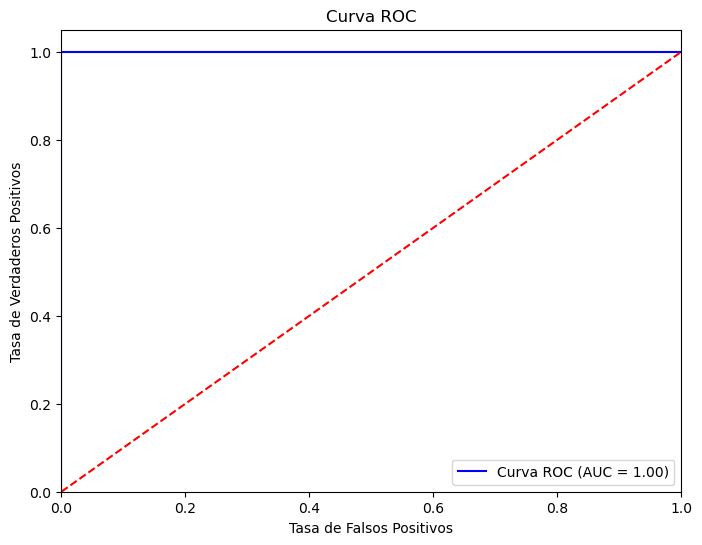

In [ ]:
from sklearn.metrics import roc_curve, auc


# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### **Conclusión**

En este proyecto se ha podido desarrollar un modelo predictivo efectivo para clasificar vehículos según su tipo de combustible. Y se ha logrado obtener un modelo que puede ser útil para la toma de decisiones en la industria automotriz, ademas de nuestro objetivo en particular.
Por lo tanto podemos validar la hipotesis nula, pudiendo predecir el tipo de combustible que utiliza el auto con distintas variables propias del vehiculo.